In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/Saved models/my_model_vgg16.h5')

In [ ]:
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Two classes
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/tem/TRAINING",
                                           target_size=(224,224),
                                           batch_size=25,
                                           class_mode='binary')

test_dataset = test.flow_from_directory("/content/drive/MyDrive/tem/TESTING",
                                         target_size=(224,224),
                                         batch_size=25,
                                         class_mode='binary')

Found 738 images belonging to 2 classes.
Found 316 images belonging to 2 classes.


In [ ]:
test_labels=train_dataset.class_indices

In [ ]:
accuracy = model.evaluate(test_dataset)[1]
print("Overall accuracy:",accuracy)

13/13 [==============================] - 202s 15s/step - loss: 0.7122 - accuracy: 0.5127
Overall accuracy: 0.5126582384109497


1/1 [==============================] - 1s 741ms/step
No facial paralysis
0.30507907


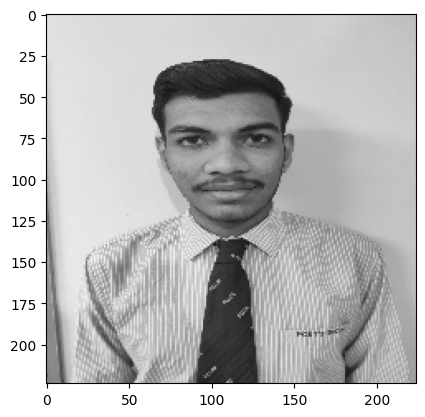

In [ ]:
# Load and preprocess the test image
import numpy as np
test_image = cv2.imread('/content/drive/MyDrive/Testing images2/ppppp.jpg')
resized_test_image = cv2.resize(test_image, (224, 224))
normalized_test_image = test.flow(np.array([resized_test_image]))[0]

threshold = 0.5
predicted_probability = model.predict(normalized_test_image)[0][0]  # get the predicted probability
predicted_class = 1 if predicted_probability >= threshold else 0

# Display the image and predicted label
plt.imshow(test_image)
if predicted_class==0:
    print('No facial paralysis')
else:
    print('Facial paralysis')

print(predicted_probability)

1/1 [==============================] - 1s 559ms/step
No facial paralysis
0.3945058


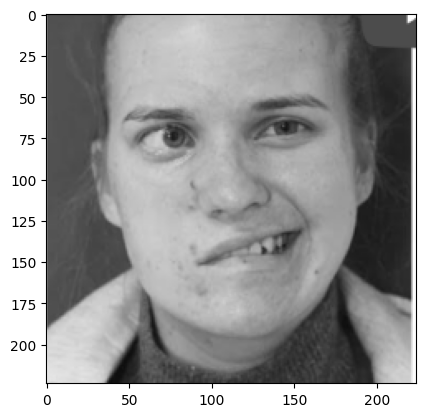

In [ ]:
# Load and preprocess the test image
import numpy as np
test_image = cv2.imread('/content/drive/MyDrive/Testing images2/7.png')
resized_test_image = cv2.resize(test_image, (224, 224))
normalized_test_image = test.flow(np.array([resized_test_image]))[0]

threshold = 0.5
predicted_probability = model.predict(normalized_test_image)[0][0]  # get the predicted probability
predicted_class = 1 if predicted_probability >= threshold else 0

# Display the image and predicted label
plt.imshow(test_image)
if predicted_class==0:
    print('No facial paralysis')
else:
    print('Facial paralysis')

print(predicted_probability)